In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist

In [2]:
from sklearn.model_selection import train_test_split
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

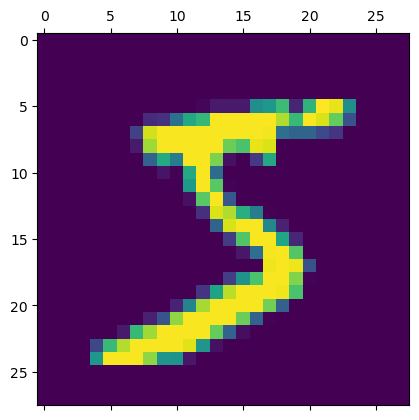

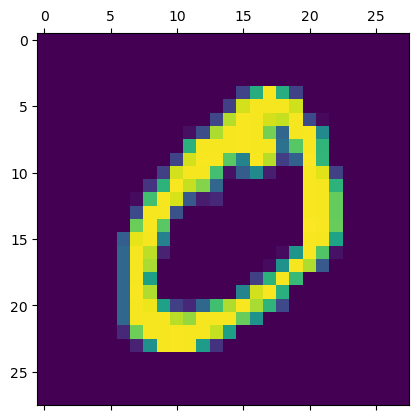

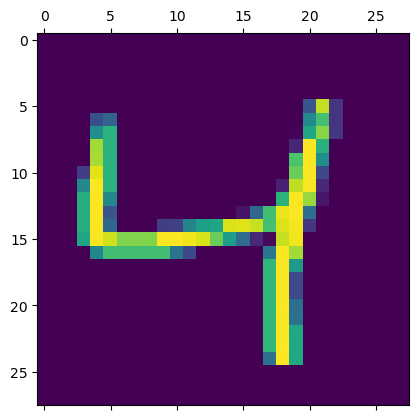

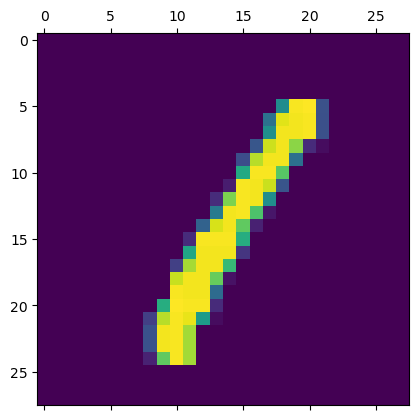

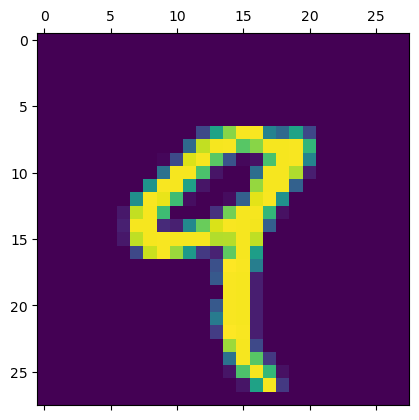

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(5):
    plt.matshow(train_images[i])

In [4]:
from tensorflow.keras import layers, models
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

In [5]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

In [6]:
model1.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 11s 15ms/step - loss: 0.3328 - accuracy: 0.9278 - val_loss: 0.0980 - val_accuracy: 0.9703
Epoch 2/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0673 - accuracy: 0.9790 - val_loss: 0.0633 - val_accuracy: 0.9813
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0461 - accuracy: 0.9853 - val_loss: 0.0593 - val_accuracy: 0.9843
Epoch 4/10
750/750 [==============================] - 12s 17ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0605 - val_accuracy: 0.9853
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0595 - val_accuracy: 0.9843
Epoch 6/10
750/750 [==============================] - 12s 17ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0608 - val_accuracy: 0.9841
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0582 - val_accuracy:

In [7]:
y_pred = model1.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [8]:
from sklearn.metrics import accuracy_score
report1 = model1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9894


In [9]:
# with pre-processing
from tensorflow.keras.utils import to_categorical
train_images = train_images.reshape((60000, 28, 28, 1)) / 255
test_images = test_images.reshape((10000, 28, 28, 1)) / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [11]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model2.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 12s 15ms/step - loss: 0.2188 - accuracy: 0.9321 - val_loss: 0.0854 - val_accuracy: 0.9749
Epoch 2/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0611 - val_accuracy: 0.9822
Epoch 3/10
750/750 [==============================] - 11s 14ms/step - loss: 0.0414 - accuracy: 0.9869 - val_loss: 0.0458 - val_accuracy: 0.9864
Epoch 4/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0457 - val_accuracy: 0.9856
Epoch 5/10
750/750 [==============================] - 11s 14ms/step - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0442 - val_accuracy: 0.9885
Epoch 6/10
750/750 [==============================] - 11s 15ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0463 - val_accuracy: 0.9868
Epoch 7/10
750/750 [==============================] - 11s 14ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0431 - val_accuracy:

In [13]:
report2 = model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0369 - accuracy: 0.9898
